In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
import math
from scipy.optimize import fmin_tnc
#plt.style.use('ggplot')
plt.xkcd()

In [3]:
data = sio.loadmat('ex3data1.mat')

In [4]:
X = data['X']
y = data['y']

m, n = X.shape
#num_labels = 10
#l = 1

In [6]:
def displayData(X, width=round(math.sqrt(X.shape[1]))):
    plt.figure(figsize=(10, 6))
    m, n = X.shape
    height = n // width
    
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    
    pad = 1
    
    display_array = -np.ones((pad + display_rows * (height + pad), \
                            pad + display_cols * (width + pad))) 
    curr_ex = 0
    for j in range(0, display_rows):
        for i in range(0, display_cols):
            max_val = np.absolute(X[curr_ex]).max()
            row, col = np.indices((height, width))
            display_array[pad + j * (height+pad) + row, \
                          pad + i * (width+pad) + col] = \
                            X[curr_ex].reshape(height, width, order='F') / max_val
                            #np.reshape(X[curr_ex], (height, width)) / max_val
            curr_ex += 1
        if curr_ex > m:
            break
    plt.imshow(display_array)

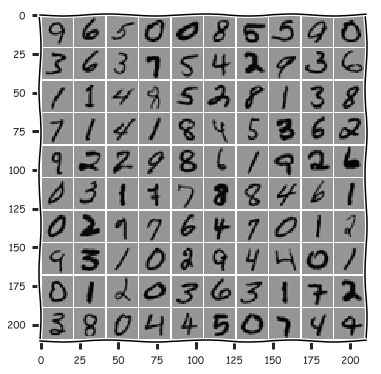

In [7]:
# Preview numbers
sel = X[np.random.randint(1, len(X), (100))] # Randomly select 100 numbers
displayData(sel)

In [41]:
# Load predetermined weights
weights = sio.loadmat('ex3weights.mat')

In [42]:
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

In [52]:
# Generating predictions using the predetermined weights

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

X_bias = np.c_[np.ones((m, 1)), X]
a2 = np.c_[np.ones((m, 1)), sigmoid(X_bias @ Theta1.T)]


In [54]:
# Calculate predictions for each example
pred = (np.argmax(sigmoid(a2 @ Theta2.T), axis=1) + 1).reshape((m,1))
accuracy = np.mean(pred == y) * 100
print('Training set accuracy: {}'.format(accuracy))

Training set accuracy: 97.52
